In [9]:
%cd /Users/vitthal/Documents/Research/DataScience/MedicalResearch/mgmt

/Users/vitthal/Documents/Research/DataScience/MedicalResearch/mgmt


In [10]:
path = '/Users/vitthal/Documents/Research/DataScience/MedicalResearch/mgmt/'
block_h, block_w = (120, 120)

load_Case_1_1_Model = 'Model_Case_1_1.h5'
load_Case_1_2_Model = 'Model_Case_1_2.h5'
load_Case_1_3_Model = 'Model_Case_1_3.h5'
load_Case_1_4_Model = 'Model_Case_1_4.h5'
load_Case_1_5_Model = 'Model_Case_1_5.h5'
load_Case_2_1_Model = 'Model_Case_2_1.h5'
load_Case_2_2_Model = 'Model_Case_2_2.h5'
load_Case_2_3_Model = 'Model_Case_2_3.h5'
load_Case_2_4_Model = 'Model_Case_2_4.h5'
load_Case_2_5_Model = 'Model_Case_2_5.h5'
load_Case_3_1_Model = 'Model_Case_3_1.h5'
load_Case_3_2_Model = 'Model_Case_3_2.h5'
load_Case_3_3_Model = 'Model_Case_3_3.h5'
load_Case_3_4_Model = 'Model_Case_3_4.h5'
load_Case_3_5_Model = 'Model_Case_3_5.h5'
load_Case_4_1_Model = 'Model_Case_4_1.h5'
load_Case_4_2_Model = 'Model_Case_4_2.h5'
load_Case_4_3_Model = 'Model_Case_4_3.h5'
load_Case_4_4_Model = 'Model_Case_4_4.h5'
load_Case_4_5_Model = 'Model_Case_4_5.h5'
load_Case_5_1_Model = 'Model_Case_5_1.h5'
load_Case_5_2_Model = 'Model_Case_5_2.h5'
load_Case_5_3_Model = 'Model_Case_5_3.h5'
load_Case_5_4_Model = 'Model_Case_5_4.h5'
load_Case_5_5_Model = 'Model_Case_5_5.h5'


In [11]:
# Function Definition --> For reading the Images and append it to a list

def Reading_Data():
    # It is a progress bar, Used to track the estimated remaining time.
    from tqdm import tqdm
    import cv2  # Used for Images processing.
    splitpath = os.listdir(Split_Path)
    if '.DS_Store' in splitpath:
        splitpath.remove('.DS_Store')
    for category in splitpath:
        # Joining path for "MGMT_positive & MGMT_negative".
        Category_Path = os.path.join(Split_Path, category + '/')
        # Initializing index for each class.
        class_num = splitpath.index(category)
        categorypath = os.listdir(Category_Path)
        if '.DS_Store' in categorypath:
            categorypath.remove('.DS_Store')
        # Working with the folders of images
        # for img_folder in tqdm(categorypath):
        Img_Path = Category_Path + '/'
        imagepath = os.listdir(Img_Path)
        if '.DS_Store' in imagepath:
            imagepath.remove('.DS_Store')
        for img in imagepath:  # listing all images present in the image folder.
            try:
                img_array = cv2.imread(os.path.join(
                    Img_Path, img), cv2.IMREAD_GRAYSCALE)
                # Saving images with their corresponding class labels.
                test_data.append([img_array, class_num])
            except Exception as e:
                pass


In [12]:
# Function Defination --> For Initilizing all features & labels of the processed image in the list X & Y

def Initilizing_Features_Labels():
    for features, label in test_data:
        X.append(features)
        y.append(label)

    print('List Size: ', len(X), len(y))


In [13]:
# Function Defination --> Converting List into Numpy Array for faster calculation & it also take less space.

def Converting(block_h, block_w):
    import numpy as np  # Used for array operations.
    global X, y

    # -1 is added to solve dimension mismatch while converting list to an array.
    X = np.array(X).reshape(-1, block_h, block_w, 1)
    y = np.array(y)

    # Print shape of the loading data
    print('Shape of X:\t', X.shape)
    print('Shape of y:\t', y.shape)


In [14]:
# Function Definition --> Loading the model

def Load_Model(dir):
    if case == 'Case_1':
        my_model = tf.keras.models.load_model(
          dir  + load_Case_1_1_Model)
    elif case == 'Case_2':
        my_model = tf.keras.models.load_model(
            dir + load_Case_2_1_Model)
    elif case == 'Case_3':
        my_model = tf.keras.models.load_model(
        dir + load_Case_3_1_Model)
    elif case == 'Case_4':
        my_model = tf.keras.models.load_model(
           dir + load_Case_4_1_Model)
    elif case == 'Case_5':
        my_model = tf.keras.models.load_model(
           dir + load_Case_5_1_Model)

    return my_model


In [15]:
# Function Definition --> Plotting the AUC-ROC Curve

def Plotting_AUC_ROC_Curve(X, y, model):
    import sklearn.metrics as metrics
    import matplotlib.pyplot as plt

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict(X)
    preds = probs[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(y, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])

    plt.title('Receiver Operating Characteristic')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    plt.show()
    plt.savefig(path + 'Outputs/BRATS/flair_output/AUC-ROC_Graph_' + case + '.png')


Case_5
Length of the total test data: 4135
List Size:  4135 4135
Shape of X:	 (4135, 120, 120, 1)
Shape of y:	 (4135,)
my_model
  1/130 [..............................] - ETA: 11s

2022-11-24 17:39:09.149674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 [==============================] - 2s 13ms/step


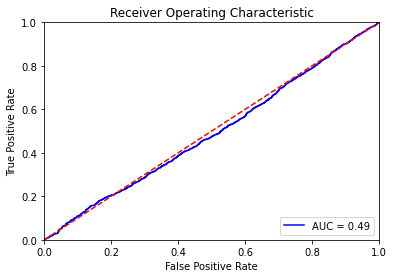



Case_2
Length of the total test data: 4314
List Size:  4314 4314
Shape of X:	 (4314, 120, 120, 1)
Shape of y:	 (4314,)
my_model
 18/135 [===>..........................] - ETA: 0s

2022-11-24 17:39:12.704178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


135/135 [==============================] - 1s 8ms/step


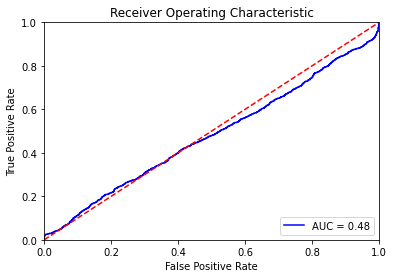



Case_3
Length of the total test data: 4156
List Size:  4156 4156
Shape of X:	 (4156, 120, 120, 1)
Shape of y:	 (4156,)
my_model
 15/130 [==>...........................] - ETA: 0s

2022-11-24 17:39:15.448757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 [==============================] - 1s 8ms/step


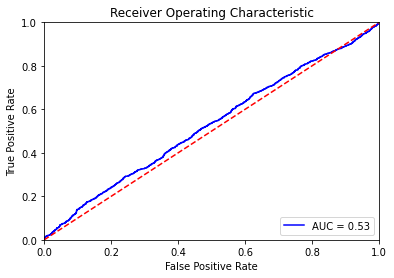



Case_4
Length of the total test data: 4277
List Size:  4277 4277
Shape of X:	 (4277, 120, 120, 1)
Shape of y:	 (4277,)
my_model
 17/134 [==>...........................] - ETA: 0s

2022-11-24 17:39:18.687549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


134/134 [==============================] - 1s 9ms/step


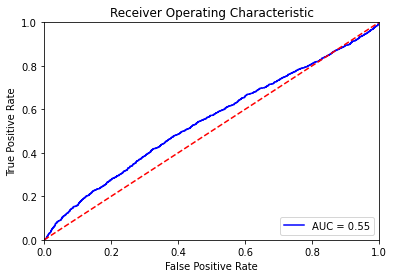



Case_1
Length of the total test data: 3925
List Size:  3925 3925
Shape of X:	 (3925, 120, 120, 1)
Shape of y:	 (3925,)
my_model
 18/123 [===>..........................] - ETA: 0s

2022-11-24 17:39:21.470600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


123/123 [==============================] - 1s 8ms/step


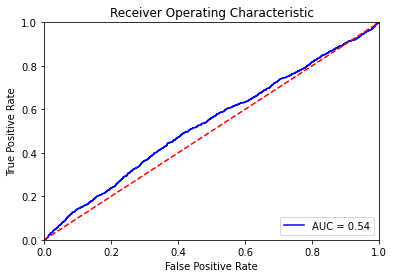



Done..!!


<Figure size 432x288 with 0 Axes>

In [16]:
# All Function Calls
import os
# It is a progress bar, Used to track the estimated remaining time.
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import load_model
from keras.utils.np_utils import to_categorical
import numpy as np

PATH = path + 'Data/BRATS/mod_data1/'
Work_Dir = PATH + 'Working_Data/'
Result_folder = path + 'Outputs/BRATS/flair_mod_1/'
Result_File = path + 'Outputs/BRATS/flair_mod_1/Final_Test_Result.txt'
workdir = os.listdir(Work_Dir)
if '.DS_Store' in workdir:
    workdir.remove('.DS_Store')
# Calling Functions:
for case in workdir:
    print(case)
    Case_Path = os.path.join(Work_Dir, case)  # Joining path for "Cases'.
    # Joining "test" folder with "Cases" path.
    Split_Path = Case_Path + '/test/'

    # Creating list for storing processed data
    test_data = []

    # Function Call --> For reading the Images and append it to a list
    Reading_Data()

    # Printing Length of the test data.
    print('Length of the total test data: ' + str(len(test_data)))

    # Initilizing all features & labels of the processed image in the list X & Y.
    X = []
    y = []

    # Function Call --> For Initilizing all features & labels of the processed image in the list X & Y
    Initilizing_Features_Labels()

    # Function Call --> For Converting List into Numpy Array for faster calculation & it also take less space.
    Converting(block_h, block_w)

    results = []

    # Function call --> Loading the model
    my_model = Load_Model(Result_folder)
    print("my_model")

    # Function Call --> Plotting the AUC-ROC Curve

    Plotting_AUC_ROC_Curve(X, y, my_model)

    print('\n')

os.chdir(path)
print('Done..!!')
